In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
conda install -c conda-forge lightgbm

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [5]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [6]:
# Number of rows
train.shape[0]

1458644

In [7]:
# Number of columns
train.shape[1]

11

In [8]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
train.duplicated().sum()

0

In [10]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [11]:
test.duplicated().sum()

0

In [12]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [ ]:
# EDA

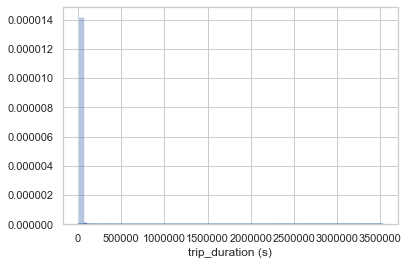

In [13]:
sns.set(style = "whitegrid")
sns.distplot(train["trip_duration"],axlabel = "trip_duration (s)")

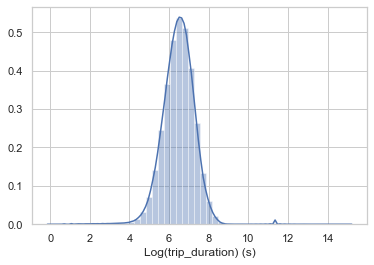

In [14]:
sns.distplot(np.log(train["trip_duration"]).values, axlabel = "Log(trip_duration) (s)")

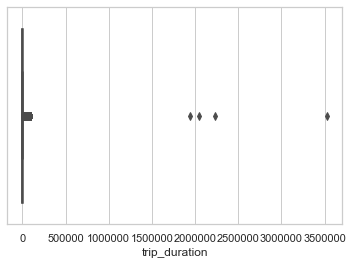

In [15]:
sns.boxplot(train["trip_duration"])

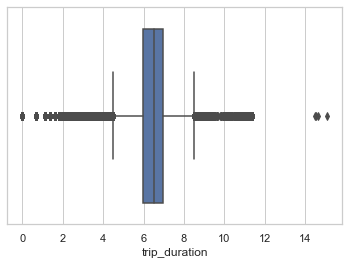

In [16]:
sns.boxplot(np.log(train["trip_duration"]))

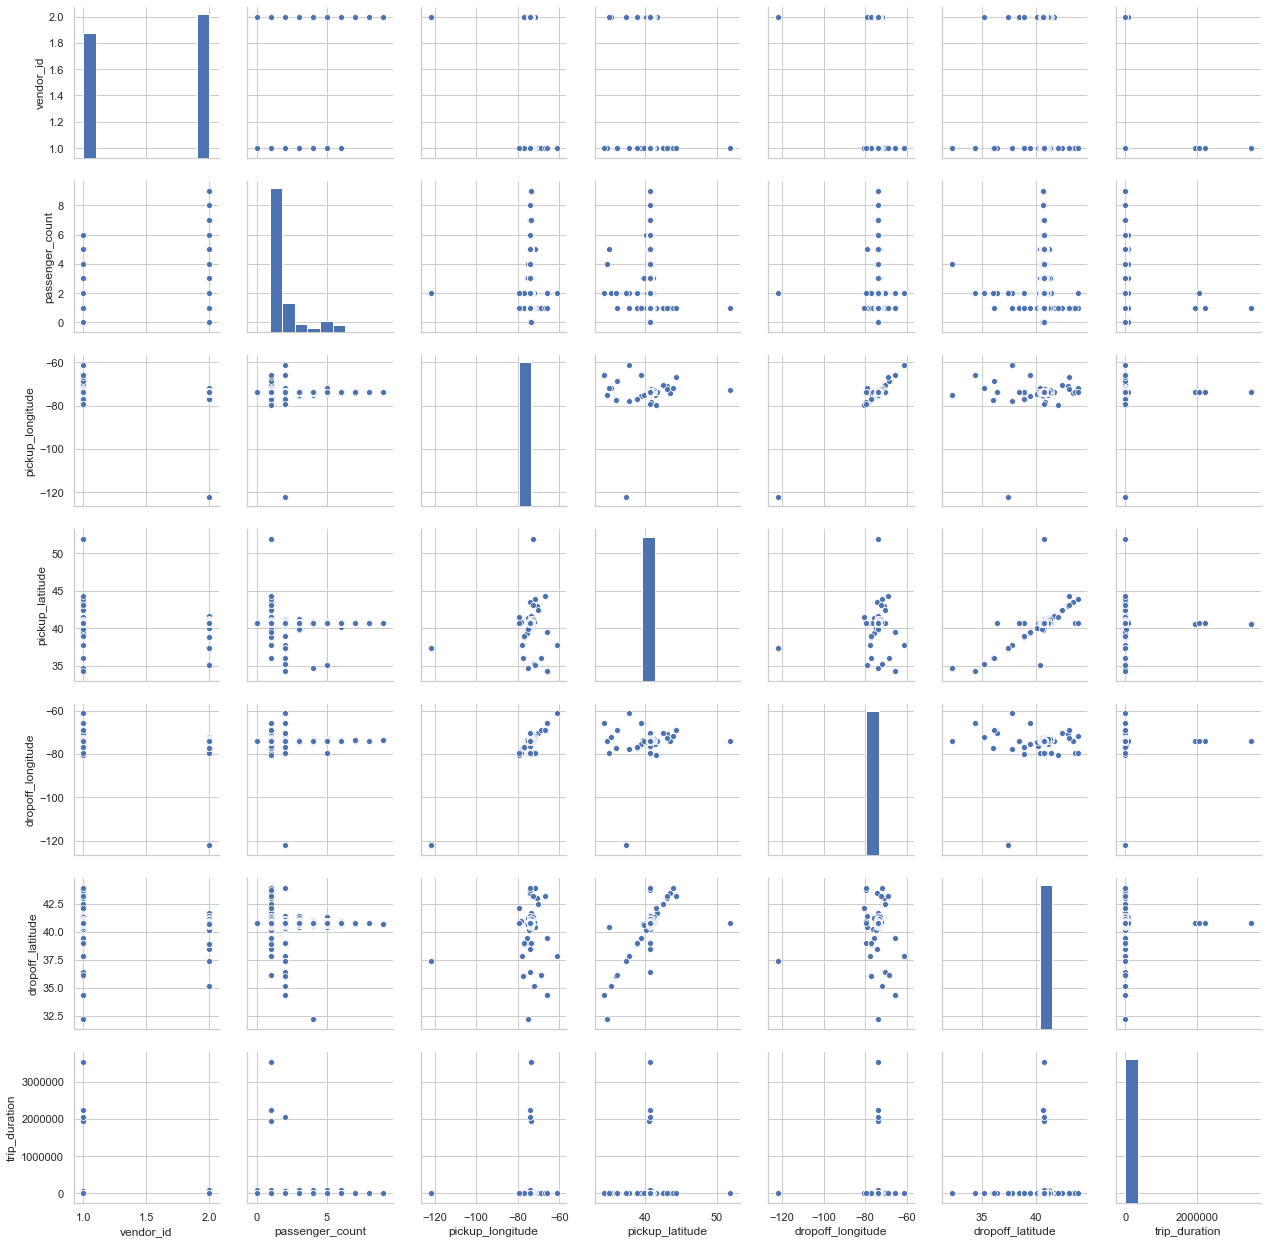

In [17]:
sns.pairplot(train)

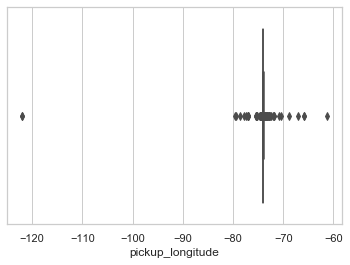

In [18]:
sns.boxplot(train["pickup_longitude"])

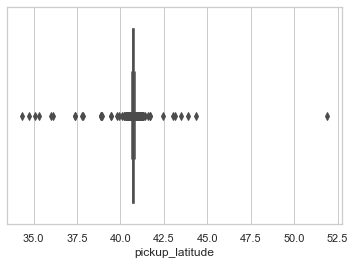

In [19]:
sns.boxplot(train["pickup_latitude"])

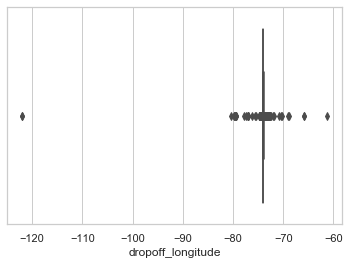

In [20]:
sns.boxplot(train["dropoff_longitude"])

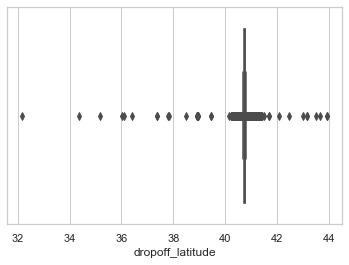

In [21]:
sns.boxplot(train["dropoff_latitude"])

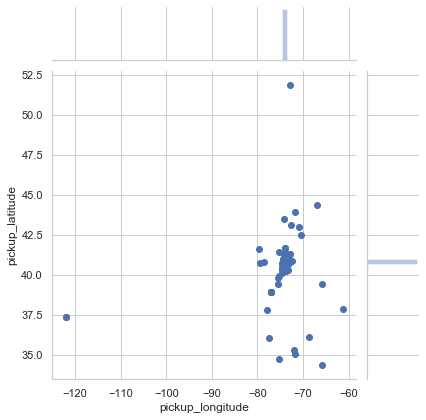

In [22]:
sns.jointplot(x=train["pickup_longitude"], y=train["pickup_latitude"])

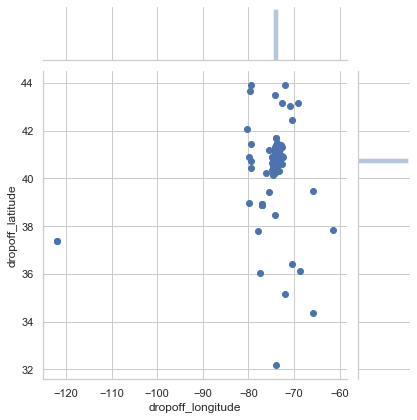

In [23]:
sns.jointplot(x=train["dropoff_longitude"], y=train["dropoff_latitude"])

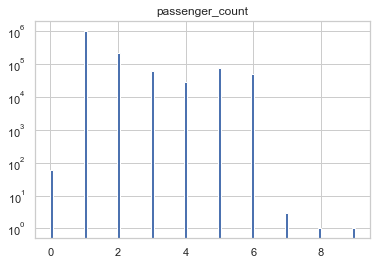

In [24]:
train["passenger_count"].hist(bins=100,log=True);
plt.title("passenger_count")
plt.show()

In [25]:
len(train.vendor_id.unique())

2

In [26]:
len(train.id.unique())

1458644

In [27]:
print("Record time between", train.pickup_datetime.min(),"and",train.dropoff_datetime.max())
print("Test time between", test.pickup_datetime.min(),"and", test.pickup_datetime.max())

Record time between 2016-01-01 00:00:17 and 2016-07-01 23:02:03
Test time between 2016-01-01 00:00:22 and 2016-06-30 23:59:58


In [20]:
# Create copy version for modeling
train_v1 = pd.read_csv("train.csv")
test_v1 = pd.read_csv("test.csv")

In [21]:
# Remove outliers
train_v1 = train_v1.loc[(train_v1["trip_duration"] >= 55) & (train_v1["trip_duration"] <= 5000)]
train_v1 = train_v1.loc[(train_v1["pickup_longitude"] >= -80) & (train_v1["pickup_longitude"] <= -70)]
train_v1 = train_v1.loc[(train_v1["pickup_latitude"] >= 40) & (train_v1["pickup_latitude"] <= 42.5)]
train_v1 = train_v1.loc[(train_v1["dropoff_longitude"] >= -80) & (train_v1["dropoff_longitude"] <= -70)]
train_v1 = train_v1.loc[(train_v1["dropoff_latitude"] >= 40) & (train_v1["dropoff_latitude"] <= 42)]
train_v1 = train_v1.loc[(train_v1["passenger_count"] >= 0) & (train_v1["passenger_count"] <= 6)]

In [22]:
train_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446999 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1446999 non-null object
vendor_id             1446999 non-null int64
pickup_datetime       1446999 non-null object
dropoff_datetime      1446999 non-null object
passenger_count       1446999 non-null int64
pickup_longitude      1446999 non-null float64
pickup_latitude       1446999 non-null float64
dropoff_longitude     1446999 non-null float64
dropoff_latitude      1446999 non-null float64
store_and_fwd_flag    1446999 non-null object
trip_duration         1446999 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 132.5+ MB


In [23]:
# Discard dropoff_datetime
train_v1.drop("dropoff_datetime",axis=1)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [24]:
# Create date features
train_v1['pickup_datetime'] = pd.to_datetime(train_v1.pickup_datetime)
test_v1['pickup_datetime'] = pd.to_datetime(test_v1.pickup_datetime)

train_v1['month'] = train_v1.pickup_datetime.dt.month
train_v1['week_of_year'] = train_v1.pickup_datetime.dt.weekofyear
train_v1['weekday'] = train_v1.pickup_datetime.dt.weekday
train_v1['day_of_year'] = train_v1.pickup_datetime.dt.dayofyear
train_v1['hour'] = train_v1.pickup_datetime.dt.hour
train_v1['minute'] = train_v1.pickup_datetime.dt.minute
train_v1['minute_of_day'] = train_v1['hour'] * 60 + train_v1['minute']

test_v1['month'] = test_v1.pickup_datetime.dt.month
test_v1['week_of_year'] = test_v1.pickup_datetime.dt.weekofyear
test_v1['weekday'] = test_v1.pickup_datetime.dt.weekday
test_v1['day_of_year'] = test_v1.pickup_datetime.dt.dayofyear
test_v1['hour'] = test_v1.pickup_datetime.dt.hour
test_v1['minute'] = test_v1.pickup_datetime.dt.minute
test_v1['minute_of_day'] = test_v1['hour'] * 60 + test_v1['minute']

In [25]:
# Create distance feature in KM
def haversine(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [26]:
train_v1["distance"] = haversine(train_v1["pickup_latitude"].values, train_v1["pickup_longitude"].values, train_v1["dropoff_latitude"].values, train_v1["dropoff_longitude"].values)
test_v1["distance"] = haversine(test_v1["pickup_latitude"].values, test_v1["pickup_longitude"].values, test_v1["dropoff_latitude"].values, test_v1["dropoff_longitude"].values)

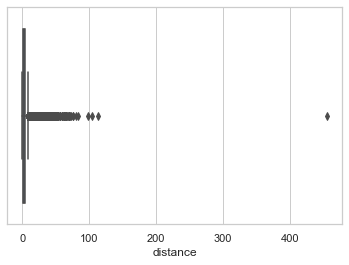

In [35]:
sns.boxplot(train_v1["distance"])

In [27]:
train_v1 = train_v1[(train_v1.distance < 100)]

In [28]:
train_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446996 entries, 0 to 1458643
Data columns (total 19 columns):
id                    1446996 non-null object
vendor_id             1446996 non-null int64
pickup_datetime       1446996 non-null datetime64[ns]
dropoff_datetime      1446996 non-null object
passenger_count       1446996 non-null int64
pickup_longitude      1446996 non-null float64
pickup_latitude       1446996 non-null float64
dropoff_longitude     1446996 non-null float64
dropoff_latitude      1446996 non-null float64
store_and_fwd_flag    1446996 non-null object
trip_duration         1446996 non-null int64
month                 1446996 non-null int64
week_of_year          1446996 non-null int64
weekday               1446996 non-null int64
day_of_year           1446996 non-null int64
hour                  1446996 non-null int64
minute                1446996 non-null int64
minute_of_day         1446996 non-null int64
distance              1446996 non-null float64
dtypes: da

In [29]:
# Create direction feature 
def ft_degree(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371 
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

train_v1['direction'] = ft_degree(train_v1['pickup_latitude'].values,
                                train_v1['pickup_longitude'].values,
                                train_v1['dropoff_latitude'].values,
                                train_v1['dropoff_longitude'].values)
test_v1['direction'] = ft_degree(test_v1['pickup_latitude'].values,
                                  test_v1['pickup_longitude'].values, 
                                  test_v1['dropoff_latitude'].values,
                                  test_v1['dropoff_longitude'].values)

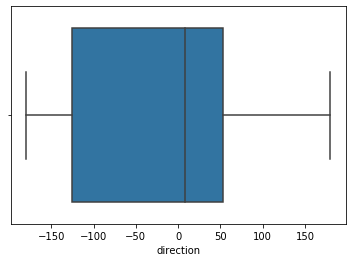

In [12]:
sns.boxplot(train_v1['direction'])

In [30]:
# Create speed feature
train_v1["speed"] = train_v1["distance"] / train_v1["trip_duration"]

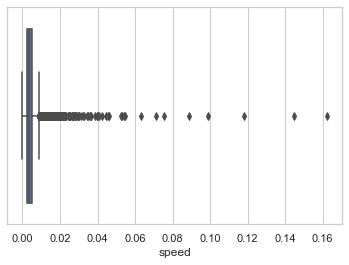

In [39]:
sns.boxplot(train_v1["speed"])

In [31]:
train_v1 = train_v1[(train_v1.speed < 0.05)]

In [32]:
train_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446984 entries, 0 to 1458643
Data columns (total 21 columns):
id                    1446984 non-null object
vendor_id             1446984 non-null int64
pickup_datetime       1446984 non-null datetime64[ns]
dropoff_datetime      1446984 non-null object
passenger_count       1446984 non-null int64
pickup_longitude      1446984 non-null float64
pickup_latitude       1446984 non-null float64
dropoff_longitude     1446984 non-null float64
dropoff_latitude      1446984 non-null float64
store_and_fwd_flag    1446984 non-null object
trip_duration         1446984 non-null int64
month                 1446984 non-null int64
week_of_year          1446984 non-null int64
weekday               1446984 non-null int64
day_of_year           1446984 non-null int64
hour                  1446984 non-null int64
minute                1446984 non-null int64
minute_of_day         1446984 non-null int64
distance              1446984 non-null float64
direction 

In [33]:
# Correlations
train_v1["trip_duration"]=train_v1["trip_duration"].values+1
features_df = train_v1[["vendor_id", "store_and_fwd_flag", "passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "distance", "direction","month", "week_of_year", "weekday", "day_of_year","minute_of_day"]]
df = pd.get_dummies(features_df, columns=["vendor_id","store_and_fwd_flag"], drop_first=True)

In [34]:
df = df.sample(frac=0.01)

Text(0.5, 1, 'Correlations between variables')

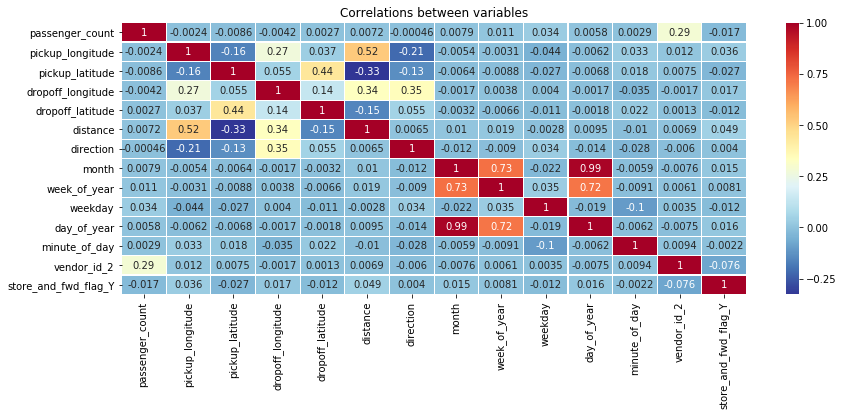

In [35]:
fig, ax = plt.subplots(figsize=(14,5))  
sns.heatmap(data=df.corr(), annot=True, cmap = plt.cm.RdYlBu_r, linewidths=.1, ax=ax).set_title('Correlations between variables')

In [36]:
# Feature selection
train_v1["trip_duration"]=train_v1["trip_duration"].values+1
features_train = train_v1[["vendor_id", "store_and_fwd_flag", "passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "distance", "direction","weekday", "day_of_year","minute_of_day"]]
X_train = pd.get_dummies(features_train, columns=["vendor_id","store_and_fwd_flag"], drop_first=True)
y = train_v1.trip_duration

features_test = test_v1[["vendor_id", "store_and_fwd_flag", "passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "distance", "direction","weekday", "day_of_year","minute_of_day"]]
X_test = pd.get_dummies(features_test, columns=["vendor_id","store_and_fwd_flag"], drop_first=True)

In [37]:
X_train.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,direction,weekday,day_of_year,minute_of_day,vendor_id_2,store_and_fwd_flag_Y
0,1,-73.982155,40.767937,-73.964630,40.765602,1.498521,99.970196,0,74,1044,1,0
1,1,-73.980415,40.738564,-73.999481,40.731152,1.805507,-117.153768,6,164,43,0,0
2,1,-73.979027,40.763939,-74.005333,40.710087,6.385098,-159.680165,1,19,695,1,0
3,1,-74.010040,40.719971,-74.012268,40.706718,1.485498,-172.737700,2,97,1172,1,0
4,1,-73.973053,40.793209,-73.972923,40.782520,1.188588,179.473585,5,86,810,1,0


In [38]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_train, y, test_size=0.2, random_state=99)

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((1157587, 12), (1157587,), (289397, 12), (289397,))

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=99)
rf.fit(train_X, train_y) 
importances = rf.feature_importances_

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
df_a=pd.DataFrame(list(zip(train_X.columns, rf.feature_importances_)),
            columns=['features', 'importances'])
df_a.sort_values(by='importances' , ascending=False)

,features,importances
5,distance,0.664265
9,minute_of_day,0.091556
6,direction,0.044042
4,dropoff_latitude,0.039960
3,dropoff_longitude,0.033780
1,pickup_longitude,0.033205
8,day_of_year,0.028955
7,weekday,0.027996
2,pickup_latitude,0.027978
0,passenger_count,0.005301


In [41]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indics = np.argsort(importances)[::-1]

df_b = pd.DataFrame(list(zip(train_X.columns, std)),
            columns=['features', 'standard deviation'])
df_b.sort_values(by='standard deviation' , ascending=False)

,features,standard deviation
5,distance,0.000957
6,direction,0.000796
2,pickup_latitude,0.000777
9,minute_of_day,0.000698
1,pickup_longitude,0.000562
4,dropoff_latitude,0.000413
3,dropoff_longitude,0.000404
7,weekday,0.000367
8,day_of_year,0.000273
0,passenger_count,0.000120


In [50]:
from sklearn.metrics import mean_squared_log_error as MSLE

In [69]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train_X, train_y)
print("The accuracy for the train_X prediction is",rf.score(train_X, train_y))
print("The accuracy for the test_X prediction is",rf.score(test_X, test_y))
print("The RMSLE score is", np.sqrt(MSLE(test_y, rf.predict(test_X))))

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy for the train_X prediction is 0.9634029892424545
The accuracy for the test_X prediction is 0.7972940149731449
The RMSLE score is 0.347163227758867


In [43]:
# Compare performance of different features selection
features_v1 = train_v1[["vendor_id", "passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "distance", "direction","weekday", "day_of_year","minute_of_day"]]
X_1 = pd.get_dummies(features_v1, columns=["vendor_id"], drop_first=True)

X_1.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,direction,weekday,day_of_year,minute_of_day,vendor_id_2
0,1,-73.982155,40.767937,-73.964630,40.765602,1.498521,99.970196,0,74,1044,1
1,1,-73.980415,40.738564,-73.999481,40.731152,1.805507,-117.153768,6,164,43,0
2,1,-73.979027,40.763939,-74.005333,40.710087,6.385098,-159.680165,1,19,695,1
3,1,-74.010040,40.719971,-74.012268,40.706718,1.485498,-172.737700,2,97,1172,1
4,1,-73.973053,40.793209,-73.972923,40.782520,1.188588,179.473585,5,86,810,1


In [46]:
X_2 = train_v1[["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "distance", "direction","weekday", "day_of_year","minute_of_day"]]
X_2.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,direction,weekday,day_of_year,minute_of_day
0,-73.982155,40.767937,-73.964630,40.765602,1.498521,99.970196,0,74,1044
1,-73.980415,40.738564,-73.999481,40.731152,1.805507,-117.153768,6,164,43
2,-73.979027,40.763939,-74.005333,40.710087,6.385098,-159.680165,1,19,695
3,-74.010040,40.719971,-74.012268,40.706718,1.485498,-172.737700,2,97,1172
4,-73.973053,40.793209,-73.972923,40.782520,1.188588,179.473585,5,86,810


In [47]:
from sklearn.model_selection import train_test_split
train_X1, test_X1, train_y1, test_y1 = train_test_split(X_1, y, test_size=0.2, random_state=99)
train_X1.shape, train_y1.shape, test_X1.shape, test_y1.shape

((1157587, 11), (1157587,), (289397, 11), (289397,))

In [48]:
train_X2, test_X2, train_y2, test_y2 = train_test_split(X_2, y, test_size=0.2, random_state=99)
train_X2.shape, train_y2.shape, test_X2.shape, test_y2.shape

((1157587, 9), (1157587,), (289397, 9), (289397,))

In [51]:
rf.fit(train_X1, train_y1)
print("The accuracy for the train_X_ prediction is",rf.score(train_X1, train_y1))
print("The accuracy for the test_X_ prediction is",rf.score(test_X1, test_y1))
print("The RMSLE score is", np.sqrt(MSLE(test_y1, rf.predict(test_X1))))

The accuracy for the train_X_ prediction is 0.9632859974980088
The accuracy for the test_X_ prediction is 0.7961205699316412
The RMSLE score is 0.34750268437184


In [52]:
rf.fit(train_X2, train_y2)
print("The accuracy for the train_X_ prediction is",rf.score(train_X2, train_y2))
print("The accuracy for the test_X_ prediction is",rf.score(test_X2, test_y2))
print("The RMSLE score is", np.sqrt(MSLE(test_y2, rf.predict(test_X2))))

The accuracy for the train_X_ prediction is 0.9634091452146941
The accuracy for the test_X_ prediction is 0.7965802368093623
The RMSLE score is 0.3468808034156325


In [53]:
# Hyperparameter Tuning
rf2 = RandomForestRegressor(n_estimators=10,min_samples_leaf=100, min_samples_split=150)
rf2.fit(train_X, train_y)
print("The accuracy for the train_X prediction is",rf2.score(train_X, train_y))
print("The accuracy for the test_X prediction is",rf2.score(test_X, test_y))
print("The RMSLE score is", np.sqrt(MSLE(test_y, rf2.predict(test_X))))

The accuracy for the train_X prediction is 0.8044769071025948
The accuracy for the test_X prediction is 0.791571472242334
The RMSLE score is 0.344704778655889


In [54]:
# Other sets of features
rf2.fit(train_X1, train_y1)
print("The accuracy for the train_X_ prediction is",rf2.score(train_X1, train_y1))
print("The accuracy for the test_X_ prediction is",rf2.score(test_X1, test_y1))
print("The RMSLE score is", np.sqrt(MSLE(test_y1, rf2.predict(test_X1))))

The accuracy for the train_X_ prediction is 0.804326518448387
The accuracy for the test_X_ prediction is 0.7915303260855181
The RMSLE score is 0.3451840860382242


In [55]:
rf2.fit(train_X2, train_y2)
print("The accuracy for the train_X_ prediction is",rf2.score(train_X2, train_y2))
print("The accuracy for the test_X_ prediction is",rf2.score(test_X2, test_y2))
print("The RMSLE score is", np.sqrt(MSLE(test_y2, rf2.predict(test_X2))))

The accuracy for the train_X_ prediction is 0.8042811362135787
The accuracy for the test_X_ prediction is 0.791529000426337
The RMSLE score is 0.34469673249948984


In [56]:
#Light GBM
import lightgbm as lgb
from lightgbm import LGBMRegressor
lgbm = lgb.LGBMRegressor()
lgbm.fit(train_X, train_y)
print("The accuracy for the train_X prediction is", lgbm.score(train_X, train_y)) 
print("The accuracy for the test_X prediction is",lgbm.score(test_X, test_y))
print("The RMSLE score is", np.sqrt(MSLE(test_y, lgbm.predict(test_X))))

//anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


The accuracy for the train_X prediction is 0.8020883060419456
The accuracy for the test_X prediction is 0.7994077431079816
The RMSLE score is 0.3431840013956614


In [57]:
# Other sets of features
lgbm.fit(train_X1, train_y1)
print("The accuracy for the train_X prediction is", lgbm.score(train_X1, train_y1)) 
print("The accuracy for the test_X prediction is",lgbm.score(test_X1, test_y1))
print("The RMSLE score is", np.sqrt(MSLE(test_y1, lgbm.predict(test_X1))))

The accuracy for the train_X prediction is 0.8020883060419456
The accuracy for the test_X prediction is 0.7994077431079816
The RMSLE score is 0.3431840013956614


In [58]:
lgbm.fit(train_X2, train_y2)
print("The accuracy for the train_X prediction is", lgbm.score(train_X2, train_y2)) 
print("The accuracy for the test_X prediction is",lgbm.score(test_X2, test_y2))
print("The RMSLE score is", np.sqrt(MSLE(test_y2, lgbm.predict(test_X2))))

The accuracy for the train_X prediction is 0.8030428823590959
The accuracy for the test_X prediction is 0.8004641473209784
The RMSLE score is 0.34231879066421667


In [59]:
# Hyperparameter Tuning
lgbm2 = lgb.LGBMRegressor(num_leaves=1000, max_depth=25, objective='regression')
lgbm2.fit(train_X, train_y)
print("The accuracy for the train_X prediction is", lgbm2.score(train_X, train_y)) 
print("The accuracy for the test_X prediction is",lgbm2.score(test_X, test_y))
print("The RMSLE score is", np.sqrt(MSLE(test_y, lgbm2.predict(test_X))))                         

The accuracy for the train_X prediction is 0.8733397307367896
The accuracy for the test_X prediction is 0.8413036279551043
The RMSLE score is 0.3101159842349071


In [60]:
lgbm2 = lgb.LGBMRegressor(num_leaves=1000, max_depth=25, objective='regression')
lgbm2.fit(train_X1, train_y1)
print("The accuracy for the train_X prediction is", lgbm2.score(train_X1, train_y1)) 
print("The accuracy for the test_X prediction is",lgbm2.score(test_X1, test_y1))
print("The RMSLE score is", np.sqrt(MSLE(test_y1, lgbm2.predict(test_X1)))) 

The accuracy for the train_X prediction is 0.8732668651406754
The accuracy for the test_X prediction is 0.8413735456954405
The RMSLE score is 0.3097587654996326


In [61]:
lgbm2.fit(train_X2, train_y2)
print("The accuracy for the train_X prediction is", lgbm2.score(train_X2, train_y2)) 
print("The accuracy for the test_X prediction is",lgbm2.score(test_X2, test_y2))
print("The RMSLE score is", np.sqrt(MSLE(test_y2, lgbm2.predict(test_X2)))) 

The accuracy for the train_X prediction is 0.8735206448988023
The accuracy for the test_X prediction is 0.8425446849544094
The RMSLE score is 0.3092026857032886


In [62]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators = 50)
gb.fit(train_X, train_y)
print("The accuracy for the train_X prediction is", gb.score(train_X, train_y)) 
print("The accuracy for the test_X prediction is",gb.score(test_X, test_y))
print("The RMSLE score is", np.sqrt(MSLE(test_y, gb.predict(test_X))))

The accuracy for the train_X prediction is 0.7222545483142976
The accuracy for the test_X prediction is 0.7202255552558205
The RMSLE score is 0.4050001498193311


In [63]:
gb.fit(train_X1, train_y1)
print("The accuracy for the train_X prediction is", gb.score(train_X1, train_y1)) 
print("The accuracy for the test_X prediction is",gb.score(test_X1, test_y1))
print("The RMSLE score is", np.sqrt(MSLE(test_y1, gb.predict(test_X1))))

The accuracy for the train_X prediction is 0.7222545483142974
The accuracy for the test_X prediction is 0.7202255552558203
The RMSLE score is 0.4050001498193301


In [64]:
gb.fit(train_X2, train_y2)
print("The accuracy for the train_X prediction is", gb.score(train_X2, train_y2)) 
print("The accuracy for the test_X prediction is",gb.score(test_X2, test_y2))
print("The RMSLE score is", np.sqrt(MSLE(test_y2, gb.predict(test_X2))))

The accuracy for the train_X prediction is 0.7222545483142979
The accuracy for the test_X prediction is 0.720225555255821
The RMSLE score is 0.4050001498193268


In [66]:
gb2 = GradientBoostingRegressor(n_estimators =70,min_samples_leaf=100, min_samples_split=150)
gb2.fit(train_X, train_y)
print("The accuracy for the train_X prediction is", gb2.score(train_X, train_y)) 
print("The accuracy for the test_X prediction is",gb2.score(test_X, test_y))
print("The RMSLE score is", np.sqrt(MSLE(test_y, gb2.predict(test_X))))

The accuracy for the train_X prediction is 0.7377498344517883
The accuracy for the test_X prediction is 0.7356743571365093
The RMSLE score is 0.3880275210771982


In [67]:
gb2.fit(train_X1, train_y1)
print("The accuracy for the train_X prediction is", gb2.score(train_X1, train_y1)) 
print("The accuracy for the test_X prediction is",gb2.score(test_X1, test_y1))
print("The RMSLE score is", np.sqrt(MSLE(test_y1, gb2.predict(test_X1))))

The accuracy for the train_X prediction is 0.737749834451789
The accuracy for the test_X prediction is 0.73567435713651
The RMSLE score is 0.3880275210771953


In [68]:
gb2.fit(train_X2, train_y2)
print("The accuracy for the train_X prediction is", gb2.score(train_X2, train_y2)) 
print("The accuracy for the test_X prediction is",gb2.score(test_X2, test_y2))
print("The RMSLE score is", np.sqrt(MSLE(test_y2, gb2.predict(test_X2))))

The accuracy for the train_X prediction is 0.7377498344517883
The accuracy for the test_X prediction is 0.7356743571365092
The RMSLE score is 0.3880275210771955
